In [1]:
# !pip install -U imbalanced-learn

## Imports and data preparation

In [2]:
import joblib
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix


In [3]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [4]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE, SVMSMOTE, BorderlineSMOTE, ADASYN

In [5]:
dir = os.getcwd()
filename = dir + "/../filtered-vancouver-training-5-category.json"  # had to change to 5, cause of Dean's push
filename2 = dir + "/../filtered-vancouver-training-amenity-removed.json"
data_six_cat = pd.read_json(filename, lines = True)
data_amenity = pd.read_json(filename2, lines = True)


In [6]:
filtered_six = data_six_cat[["lat", "lon", "city"]].copy()
filtered_amenity = data_amenity[["lat", "lon", "city"]].copy()

In [7]:
def city_to_num(index):
    return {"Vancouver": 0, "Burnaby": 1, "Surrey": 2, "Coquitlam": 3, "Richmond": 4}[index]

## For 6 categories

In [8]:
X = filtered_six[["lat", "lon"]]
y = filtered_six["city"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = make_pipeline(BorderlineSMOTE(), RandomForestClassifier(n_estimators = 150))
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model.score(X_test, y_test)

0.5115511551155115

In [9]:
# cross val separates the data into 5 partitions and rotates them between being train and test sets
cv_arr = cross_val_score(model, X, y)
print("Average cv:", cv_arr.mean())
print(cv_arr)

Average cv: 0.4360219817670615
[0.50309278 0.49690722 0.46597938 0.36082474 0.35330579]


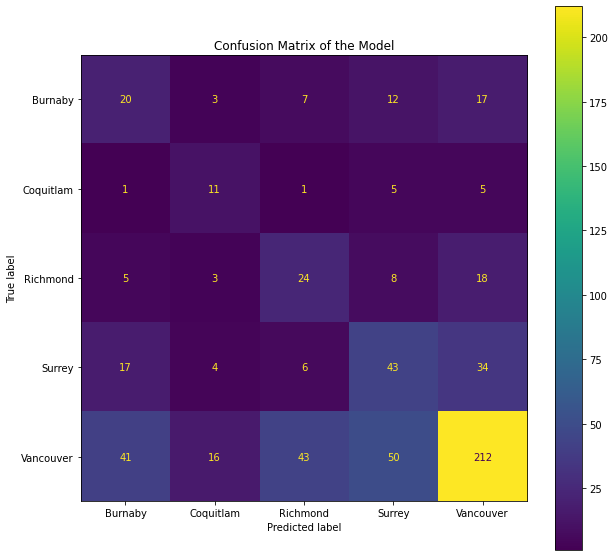

In [10]:
_, axis = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_test, y_test, ax = axis)
plt.title("Confusion Matrix of the Model")
plt.show()

In [11]:
# importing model for use
list_pickle = open(dir + '/model.pkl', 'wb')
pickle.dump(model, list_pickle)
list_pickle.close()


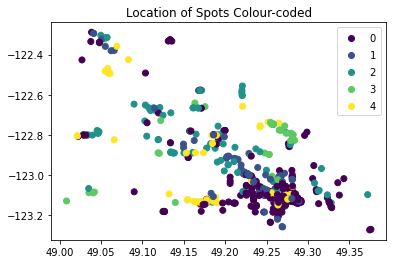

In [12]:
scatter = plt.scatter(X_test["lat"], X_test["lon"], c = (np.vectorize(city_to_num)(y_predict)), alpha = 1)
plt.legend(*scatter.legend_elements())
plt.title("Location of Spots Colour-coded")
plt.show()

## For filtered amenities

In [13]:
X_am = filtered_amenity[["lat", "lon"]]
y_am = filtered_amenity["city"]

X_am_train, X_am_test, y_am_train, y_am_test = train_test_split(X_am, y_am)

model = make_pipeline(BorderlineSMOTE(), KNeighborsClassifier(n_neighbors = 6, weights = 'distance', algorithm= 'brute', p = 3))
model.fit(X_am_train, y_am_train)
y_am_predict = model.predict(X_am_test)
model.score(X_am_test, y_am_test)

0.4708904109589041

In [14]:
cv_arr = cross_val_score(model, X_am, y_am)
print("Average cv:", cv_arr.mean())
print(cv_arr)

Average cv: 0.4172666366451921
[0.5117773  0.48608137 0.42398287 0.34689507 0.31759657]


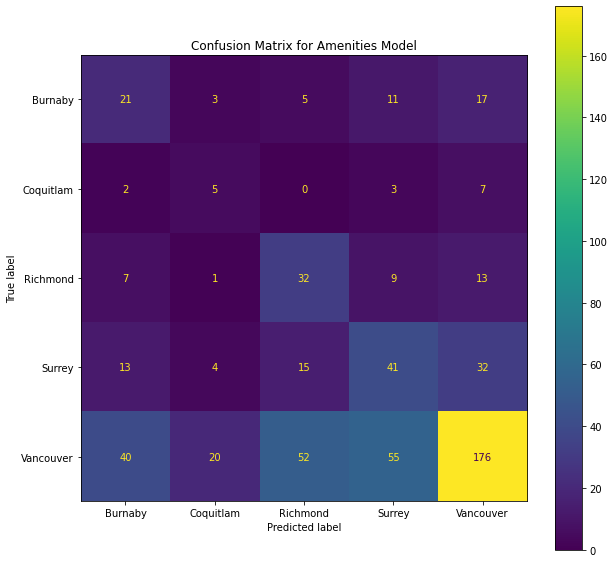

In [15]:
_, axis_am = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_am_test, y_am_test, ax = axis_am)
plt.title("Confusion Matrix for Amenities Model")
plt.show()

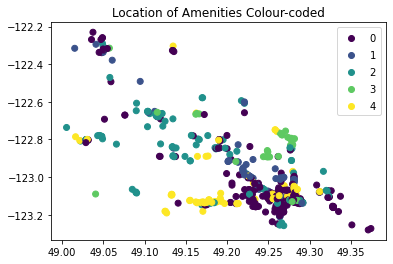

In [16]:
scatter_am = plt.scatter(X_am_test["lat"], X_am_test["lon"], c = (np.vectorize(city_to_num)(y_am_predict)), alpha = 1)
plt.legend(*scatter_am.legend_elements())
plt.title("Location of Amenities Colour-coded")
plt.show()